In [1]:
import torch
from torch import nn

In [2]:
# y=m*x + c
# let m = weight
# let c = bias
weight = 0.7
bias = 0.3
x = torch.arange(0,1,0.02)
y=weight*x +bias
y,x


(tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
         0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
         0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
         0.8040, 0.8180, 0.8320, 0.8460, 0.8600, 0.8740, 0.8880, 0.9020, 0.9160,
         0.9300, 0.9440, 0.9580, 0.9720, 0.9860]),
 tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
         0.9000, 0.9200, 0.9400, 0.9600, 0.9800]))

In [3]:
#Data is ready i.e x and y
# Split into train and test 
train = int(0.8 * len(x))
train_x=x[:train]
train_y=y[:train]
test_x=x[train:]
test_y=y[train:]
len(train_x),len(train_y),len(test_x),len(test_y)

(40, 40, 10, 10)

In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


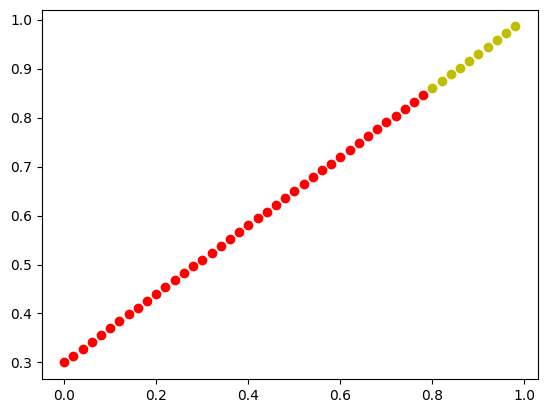

In [5]:
import matplotlib.pyplot as plt
def plot(x_train=train_x,
        y_train=train_y,
        x_test=test_x,
        y_test=test_y,
        predictions=None):
    plt.scatter(x_train,y_train,color='r')
    plt.scatter(x_test,y_test,color='y')
    if predictions is not None:
        plt.scatter(x_test,predictions,color='b')
plot(train_x,train_y,test_x,test_y)

In [6]:
#model building
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight=nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
        self.bias=nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
    def forward(self,x:torch.Tensor)->torch.Tensor :
        return self.weight*x + self.bias

In [7]:
torch.manual_seed(42)
model_0=LinearRegressionModel()
with torch.inference_mode():
    y_pred = model_0(test_x)

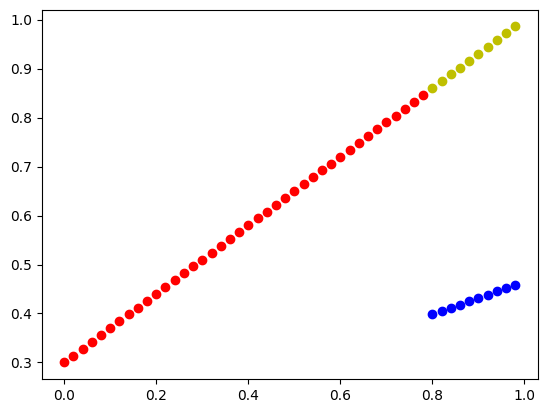

In [8]:
plot(predictions = y_pred)

In [9]:
# as random weight and bias values are incorrect, we need to update them.
# For that we need to find the loss and then backpropagate the error and then use optimizer

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [10]:
torch.manual_seed(42)

epochs=100

train_loss_value = []
test_loss_values =[]
epochs_count=[]

for epoche in range(epochs):
    #training
    model_0.train()
    y_preds = model_0(train_x)
    loss = loss_fn(y_preds, train_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #testing
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(test_x)
        test_loss = loss_fn(test_pred, test_y.type(torch.float))
        if epoche%10==0:
            epochs_count.append(epoche)
            train_loss_value.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"epoch:{epoche} | Train_loss:{loss} | test_loss:{test_loss}")
    

epoch:0 | Train_loss:0.31288138031959534 | test_loss:0.48106518387794495
epoch:10 | Train_loss:0.1976713240146637 | test_loss:0.3463551998138428
epoch:20 | Train_loss:0.08908725529909134 | test_loss:0.21729660034179688
epoch:30 | Train_loss:0.053148526698350906 | test_loss:0.14464017748832703
epoch:40 | Train_loss:0.04543796554207802 | test_loss:0.11360953003168106
epoch:50 | Train_loss:0.04167863354086876 | test_loss:0.09919948130846024
epoch:60 | Train_loss:0.03818932920694351 | test_loss:0.08886633068323135
epoch:70 | Train_loss:0.03476089984178543 | test_loss:0.0805937647819519
epoch:80 | Train_loss:0.03132382780313492 | test_loss:0.07232122868299484
epoch:90 | Train_loss:0.02788739837706089 | test_loss:0.06473556160926819


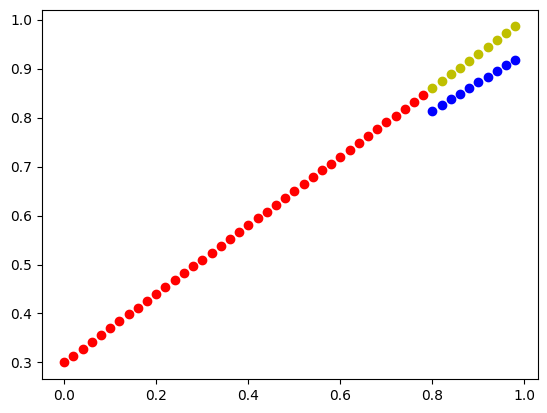

In [11]:
plot(predictions=test_pred)

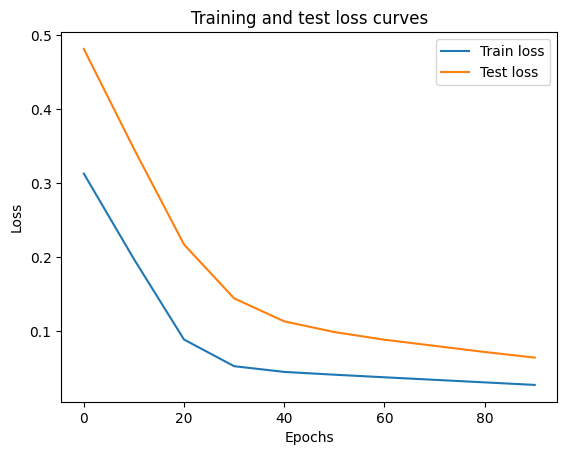

In [12]:
plt.plot(epochs_count, train_loss_value, label="Train loss")
plt.plot(epochs_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [13]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.5784])), ('bias', tensor([0.3513]))])